In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load data
df = pd.read_csv('NikeProductDescriptions.csv')

# Drop NA descriptions just in case
df = df.dropna(subset=['Product Description'])

# Preprocessing function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return ' '.join(tokens)

df['cleaned_description'] = df['Product Description'].apply(preprocess)
df[['Title', 'Subtitle', 'cleaned_description']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,Title,Subtitle,cleaned_description
0,Nike Air Force 1 '07,Men's Shoes,doesnt get legendary designed turn head nike a...
1,Nike Air Max Dawn SE,Men's Shoes,find move air max dawn rooted sporty athletics...
2,Nike SB Dunk Low Pro Premium,Skate Shoes,pack styleon foot bringing fresh twist iconic ...
3,Nike Air Force 1 Mid '07 LX,Men's Shoes,celebration keep coming unbox af1 fireside fee...
4,Nike Air Force 1 Mid '07,Men's Shoes,got fave colour yet worry colour month program...


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_description'])

# Compute cosine similarity matrix
cos_sim_matrix = cosine_similarity(tfidf_matrix)

# Show similarity between first 5 products
cos_sim_df = pd.DataFrame(cos_sim_matrix[:5, :5], columns=df['Title'][:5], index=df['Title'][:5])
cos_sim_df


Title,Nike Air Force 1 '07,Nike Air Max Dawn SE,Nike SB Dunk Low Pro Premium,Nike Air Force 1 Mid '07 LX,Nike Air Force 1 Mid '07
Title,,,,,
Nike Air Force 1 '07,1.000000,0.017613,0.016371,0.087305,0.034894
Nike Air Max Dawn SE,0.017613,1.000000,0.041447,0.000000,0.035107
Nike SB Dunk Low Pro Premium,0.016371,0.041447,1.000000,0.011145,0.028775
Nike Air Force 1 Mid '07 LX,0.087305,0.000000,0.011145,1.000000,0.098975
Nike Air Force 1 Mid '07,0.034894,0.035107,0.028775,0.098975,1.000000


In [3]:
def jaccard_similarity(doc1, doc2):
    set1 = set(doc1.split())
    set2 = set(doc2.split())
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    return len(intersection) / len(union)

# Example: Compute Jaccard similarity between first 5 products
jaccard_matrix = []

for i in range(5):
    row = []
    for j in range(5):
        sim = jaccard_similarity(df['cleaned_description'].iloc[i], df['cleaned_description'].iloc[j])
        row.append(sim)
    jaccard_matrix.append(row)

jaccard_df = pd.DataFrame(jaccard_matrix, columns=df['Title'][:5], index=df['Title'][:5])
jaccard_df


Title,Nike Air Force 1 '07,Nike Air Max Dawn SE,Nike SB Dunk Low Pro Premium,Nike Air Force 1 Mid '07 LX,Nike Air Force 1 Mid '07
Title,,,,,
Nike Air Force 1 '07,1.000000,0.029412,0.014286,0.064516,0.037037
Nike Air Max Dawn SE,0.029412,1.000000,0.030769,0.000000,0.025641
Nike SB Dunk Low Pro Premium,0.014286,0.030769,1.000000,0.016129,0.038462
Nike Air Force 1 Mid '07 LX,0.064516,0.000000,0.016129,1.000000,0.055556
Nike Air Force 1 Mid '07,0.037037,0.025641,0.038462,0.055556,1.000000


In [4]:
!pip install nltk scikit-learn --quiet

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

df = pd.read_csv("NikeProductDescriptions.csv")
df = df.dropna(subset=['Product Description'])

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return ' '.join(tokens)

df['cleaned_description'] = df['Product Description'].apply(preprocess)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


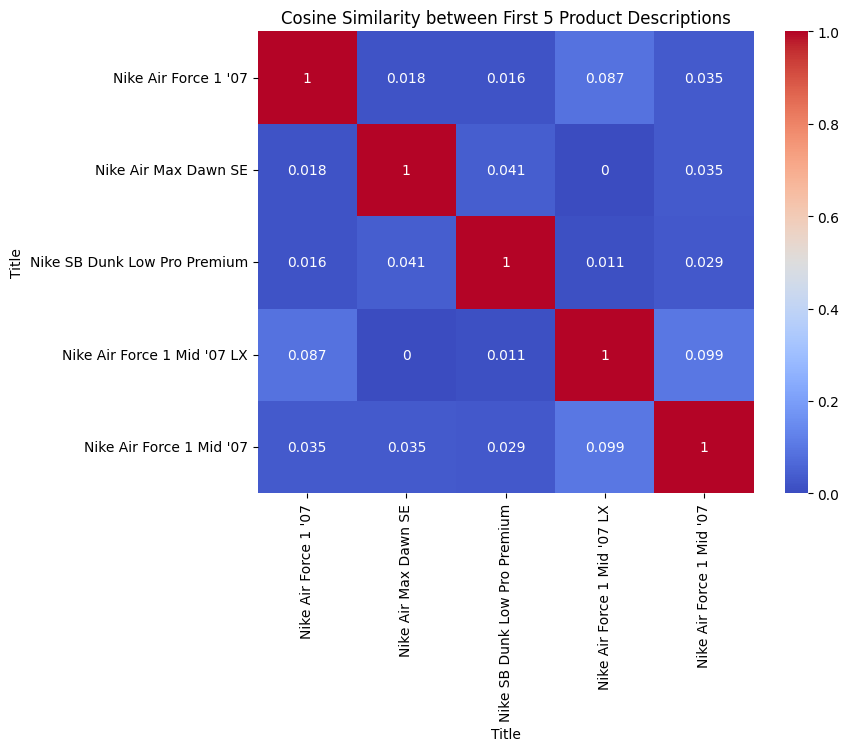

In [5]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_description'])

cos_sim_matrix = cosine_similarity(tfidf_matrix)

cos_df = pd.DataFrame(cos_sim_matrix[:5, :5],
                      index=df['Title'].iloc[:5],
                      columns=df['Title'].iloc[:5])

plt.figure(figsize=(8,6))
sns.heatmap(cos_df, annot=True, cmap="coolwarm")
plt.title("Cosine Similarity between First 5 Product Descriptions")
plt.show()


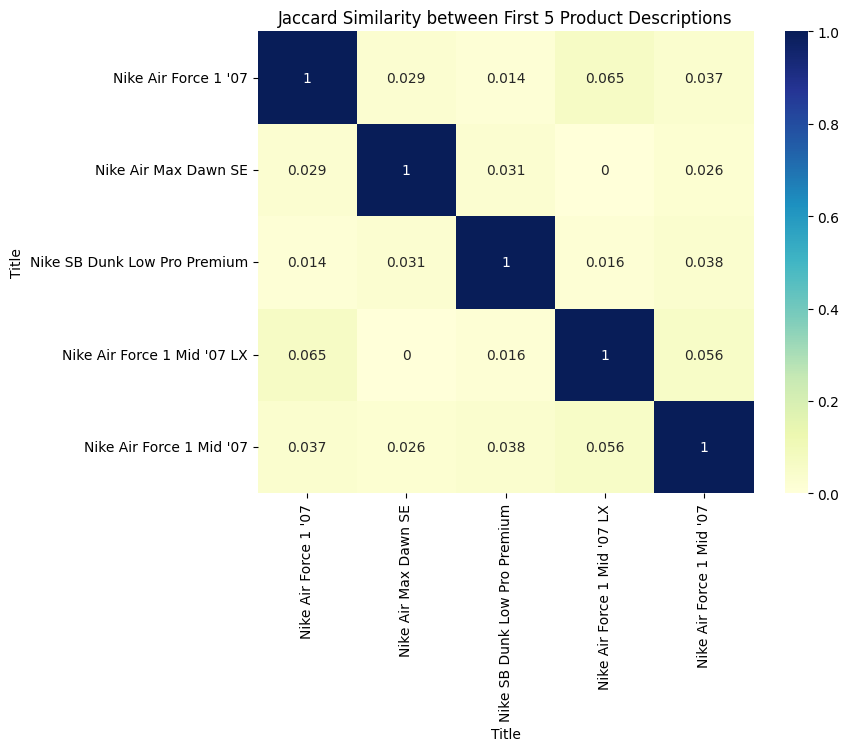

In [6]:
def jaccard_similarity(doc1, doc2):
    set1 = set(doc1.split())
    set2 = set(doc2.split())
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    return len(intersection) / len(union)

jaccard_matrix = []
for i in range(5):
    row = []
    for j in range(5):
        sim = jaccard_similarity(df['cleaned_description'].iloc[i], df['cleaned_description'].iloc[j])
        row.append(sim)
    jaccard_matrix.append(row)

jac_df = pd.DataFrame(jaccard_matrix,
                      index=df['Title'].iloc[:5],
                      columns=df['Title'].iloc[:5])

plt.figure(figsize=(8,6))
sns.heatmap(jac_df, annot=True, cmap="YlGnBu")
plt.title("Jaccard Similarity between First 5 Product Descriptions")
plt.show()
